In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import bambi as bmb

## Excercise 10.13

In [2]:
coffee_data = pd.read_csv("coffee_ratings.csv")

In [3]:
coffee_data = coffee_data[["farm_name","total_cup_points",'aroma', 'aftertaste' ]]

In [4]:
coffee_data.head()

,farm_name,total_cup_points,aroma,aftertaste
0,metad plc,90.58,8.67,8.67
1,metad plc,89.92,8.75,8.50
2,"san marcos barrancas ""san cristobal cuch",89.75,8.42,8.42
3,yidnekachew dabessa coffee plantation,89.00,8.17,8.42
4,metad plc,88.83,8.25,8.25


Because these are not independant samples , for this exercise we just look at one sample per farm name

In [5]:
new_coffee= coffee_data.groupby('farm_name').sample().reset_index(drop=True)

## Exercise 10.14
Model new_coffee rating by its aroma

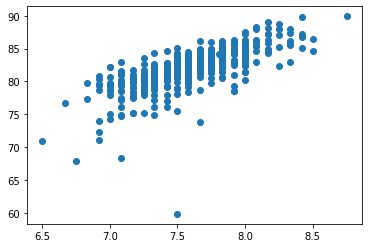

In [6]:
plt.scatter(new_coffee.aroma, new_coffee.total_cup_points)

Looks like a linear model would be *useful*

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, aroma, total_cup_points_sigma]


/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 29 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,34.655,1.975,30.884,38.306,0.008,0.006,59221.0,31029.0,1.0
aroma,6.257,0.260,5.768,6.747,0.001,0.001,59224.0,31099.0,1.0
total_cup_points_sigma,1.962,0.059,1.855,2.076,0.000,0.000,55663.0,31691.0,1.0


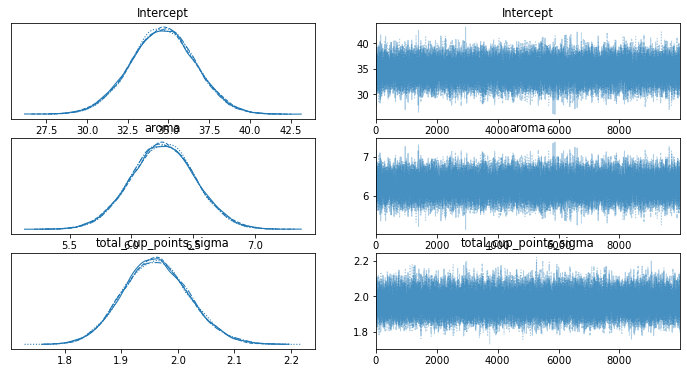

In [7]:
model = bmb.Model('total_cup_points ~ aroma', new_coffee)
results = model.fit(draws=10000, chains=4)
az.plot_trace(results)
az.summary(results)

array([<AxesSubplot:title={'center':'Intercept'}>,
       <AxesSubplot:title={'center':'aroma'}>,
       <AxesSubplot:title={'center':'total_cup_points_sigma'}>],
      dtype=object)

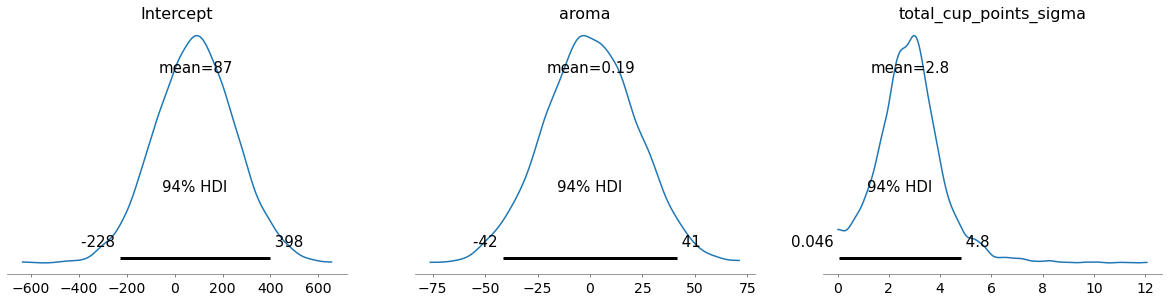

In [12]:
model.plot_priors()

* The priors seem weak informative, although maybe sigma could be a bit weaker? 
* There is strong evidence of a positive relationship between aroma and total_cup_points, for example none of the samples of the slope are less then 5!

In [24]:
np.sum(results.posterior.aroma.values.flatten() <5)

0

In [10]:
sigma_prior = bmb.Prior('Exponential', lam= 1/75.)


In [11]:
model

Formula: total_cup_points ~ aroma
Family name: Gaussian
Link: identity
Observations: 571
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 82.0633, sigma: 166.2143)
    aroma ~ Normal(mu: 0.0, sigma: 21.9173)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.7907)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

In [13]:
model2=  bmb.Model('total_cup_points ~ aroma', new_coffee, priors = {'sigma': sigma_prior})

In [14]:
model2

Formula: total_cup_points ~ aroma
Family name: Gaussian
Link: identity
Observations: 571
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 82.0633, sigma: 166.2143)
    aroma ~ Normal(mu: 0.0, sigma: 21.9173)

  Auxiliary parameters
    sigma ~ Exponential(lam: 0.0133)

array([<AxesSubplot:title={'center':'Intercept'}>,
       <AxesSubplot:title={'center':'aroma'}>,
       <AxesSubplot:title={'center':'total_cup_points_sigma'}>],
      dtype=object)

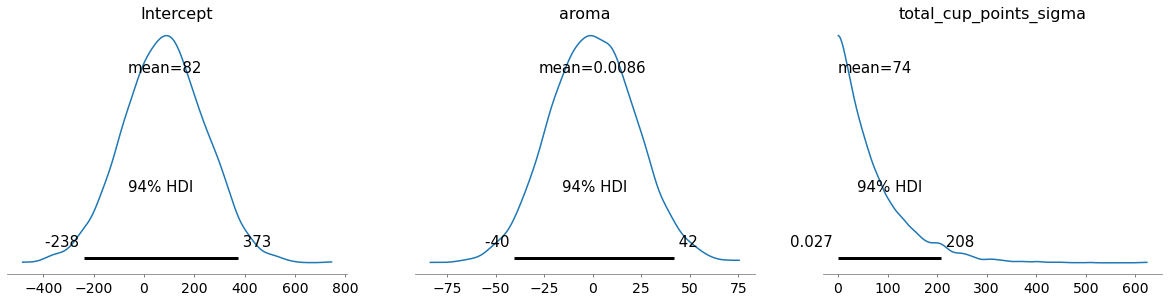

In [19]:
model2.build()
model2.plot_priors()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, aroma, total_cup_points_sigma]


/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 26 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,34.667,1.959,31.063,38.439,0.008,0.006,61737.0,32158.0,1.0
aroma,6.255,0.258,5.758,6.729,0.001,0.001,61856.0,32381.0,1.0
total_cup_points_sigma,1.963,0.058,1.853,2.073,0.000,0.000,63197.0,31780.0,1.0


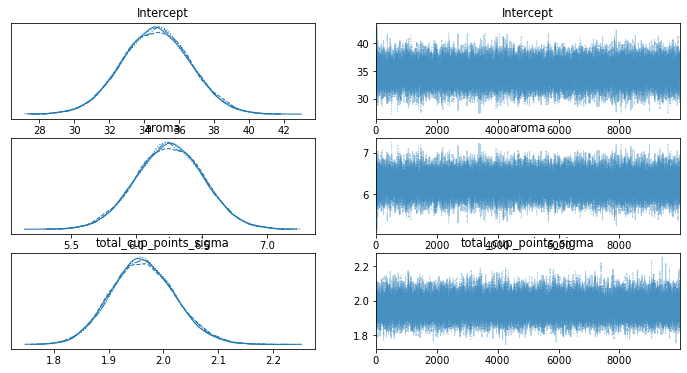

In [20]:
results2 = model2.fit(draws=10000, chains=4)
az.plot_trace(results2)
az.summary(results2)

Changed prior to exponential on sigma and didnt change the results significantly

## Exercise 10.15 
 
Not sure if there is a better way to grab these, but this works ;)

In [34]:
samples=list(zip(results2.posterior.Intercept.values.flatten(),results2.posterior.aroma.values.flatten(),results2.posterior.total_cup_points_sigma.values.flatten()))

In [35]:
first_sample = samples[0]
first_sample

(35.22245044705371, 6.176329362336204, 2.0978003532464613)

In [53]:
def sim_data_gen(Intercept, beta, sigma, aroma):
    mu = aroma*beta + Intercept
    return np.random.normal(mu,sigma)

In [104]:
coffee_data_sim = new_coffee.copy()
coffee_data_sim["sim_ratings"] = sim_data_gen(first_sample[0], first_sample[1], first_sample[2], coffee_data_sim["aroma"] )

<AxesSubplot:ylabel='Density'>

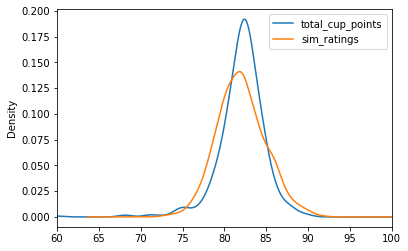

In [105]:
coffee_data_sim[["total_cup_points","sim_ratings"]].plot.kde(xlim = (60,100))

Looking at one sample , it sort of has the right character but i am suprised that my results are wider.

<AxesSubplot:xlabel='total_cup_points / total_cup_points'>

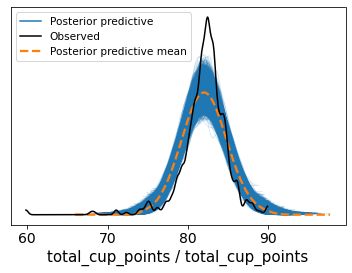

In [64]:
model2.predict(results2, kind='pps', inplace=True)
az.plot_ppc(results2)

This seems to confirm that my results are wider, and casts doubt on the assumption of a normal distribution.  Or I did something wrong in the modeling

In [65]:
coffee_data_sim.describe()

,total_cup_points,aroma,aftertaste,sim_ratings
count,1339.000000,1339.000000,1339.000000,1339.000000
mean,82.089851,7.566706,7.401083,81.982817
std,3.500575,0.377560,0.404463,3.090471
min,0.000000,0.000000,0.000000,35.963355
25%,81.080000,7.420000,7.250000,80.222642
50%,82.500000,7.580000,7.420000,82.102188
75%,83.670000,7.750000,7.580000,83.789362
max,90.580000,8.750000,8.670000,90.338149


Looking here, my sim_ratings has a NARROWER std, yet appears fatter. So we need some kind of fat tailed distribution, student's t might be better here

## Exercise 10.16

In [68]:
# For the aroma of 7.67:
posterior_predict_samples = pd.Series([sim_data_gen(Intercept, beta, sigma, 7.67) for (Intercept, beta, sigma) in samples])

<AxesSubplot:ylabel='Density'>

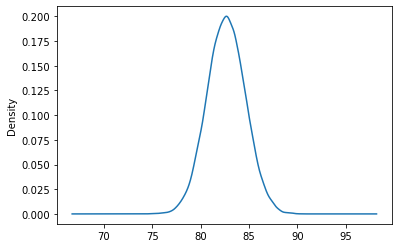

In [69]:
posterior_predict_samples.plot.kde()

In [71]:
posterior_predict_samples.describe()

count    40000.000000
mean        82.643935
std          1.977414
min         74.585552
25%         81.302362
50%         82.641891
75%         83.978684
max         90.322016
dtype: float64

In reality, this batch had a rating of 84.  A rating this high would be expected 25% of the time, so seems reasonable

In [74]:
np.mean(posterior_predict_samples >= 84)

0.24645

This is only 0.68 standard deviations away from teh mean

In [75]:
(84-np.mean(posterior_predict_samples))/np.std(posterior_predict_samples)

0.6857855099912281

/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/numpy/lib/shape_base.py:1250: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = _nx.array(A, copy=False, subok=True, ndmin=d)


array([[<AxesSubplot:xlabel='total_cup_points_dim_0', ylabel='total_cup_points'>]],
      dtype=object)

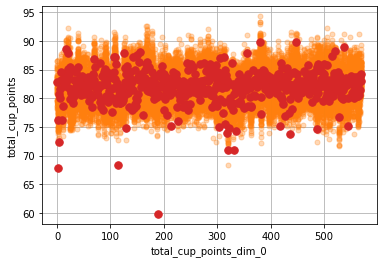

In [80]:
az.plot_lm("total_cup_points",idata=results2, legend=None)

How many batches have ratings that are within their 50% posterior prediction interval?

In [99]:

test =results2.posterior_predictive.total_cup_points[:,:,61].values.flatten()

In [102]:
np.quantile(test,(.25,.75))

array([78.66856667, 81.33703444])

In [108]:
# Compute 50 percent quantiles :

quantiles_50 = [np.quantile( results2.posterior_predictive.total_cup_points[:,:,i].values.flatten(), (.25,.75)) for i in range(len(new_coffee))]

In [111]:
np.mean([points >= q[0] and points <= q[1] for (points,q) in zip(new_coffee["total_cup_points"],quantiles_50) ])

0.6847635726795096

# Additional Topics

Note that I can make a better LM plot if I add in the x data from somewhere else. This seems to be a bug with Bambi fitting in that it doesnt include the `constant_data` data. No idea why

/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/numpy/lib/shape_base.py:1250: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = _nx.array(A, copy=False, subok=True, ndmin=d)


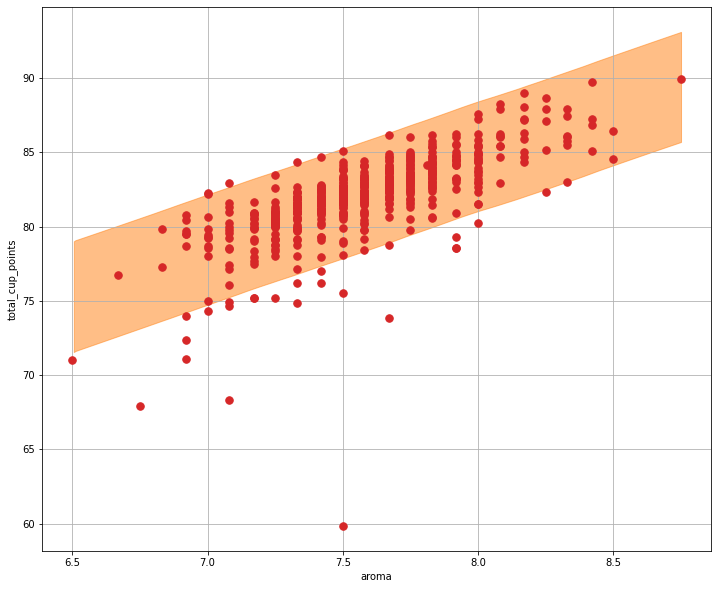

In [125]:
az.plot_lm(y="total_cup_points", idata=results2, x=model2.data.aroma, figsize= (12,10),kind_pp = 'hdi', legend= None);

In [127]:
az.plot_lm(y="total_cup_points", idata=results2, x="aroma", figsize= (12,10),kind_pp = 'hdi', legend= None);

AttributeError: 'InferenceData' object has no attribute 'constant_data'

In [129]:
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.1.4


In [140]:
with pm.Model() as model:
    # define priors
    a = pm.Normal('beta', 0, 22)
    b = pm.Normal('intercept', 82, 166)
    s = pm.Exponential('sigma', 1)
    
    aroma = pm.Data('aroma', new_coffee['aroma'],mutable = False)
    # predictions
    obs = pm.Normal('observation', a*aroma + b, s, observed=new_coffee['total_cup_points'])
    
    # use MCMC to sample
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, intercept, sigma]


/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.


In [141]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

In [146]:
with model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/numpy/lib/shape_base.py:1250: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = _nx.array(A, copy=False, subok=True, ndmin=d)


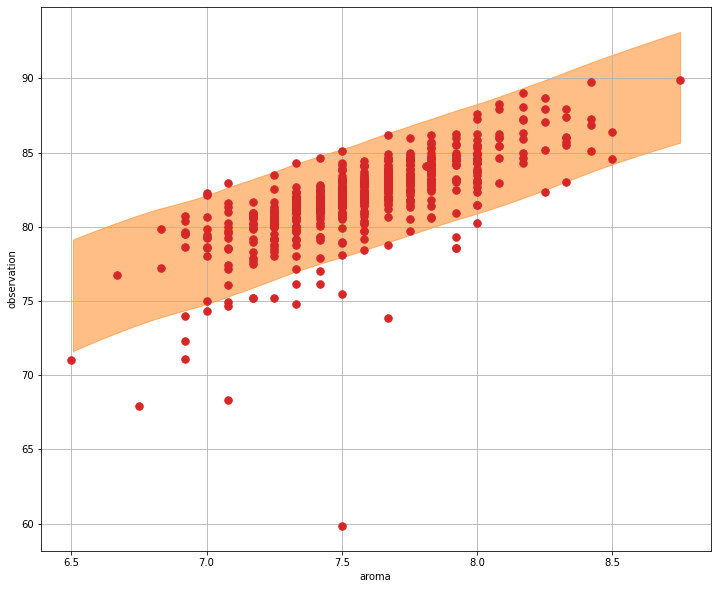

In [147]:
az.plot_lm(y="observation", idata=trace, x='aroma' , figsize= (12,10),kind_pp = 'hdi', legend= None);